In [128]:
import os, sys
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torchaudio
from torchaudio import transforms
from IPython.display import Audio

this_dir = os.path.abspath('')
parent_dir = os.path.dirname(this_dir)
if not parent_dir in sys.path: 
  sys.path.append(parent_dir)

from definitions import DATA_ROOT

In [39]:
DATA_ROOT

PosixPath('/Users/franktcao/local/workspace/machine_learning/urban_sounding/data/in')

In [40]:
fname = DATA_ROOT / "metadata" / "UrbanSound8K.csv"
df = pd.read_csv(fname)
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [41]:
def construct_filepath(fold: str, fname: str,) -> str:
  return DATA_ROOT / "audio" / f"fold{fold}" / fname

def append_filepath(df: pd.DataFrame) -> pd.DataFrame:
  df["fpath"] = df.apply(lambda row: construct_filepath(row["fold"], row["slice_file_name"]), axis=1)
  return df

In [42]:
append_filepath(df)

,slice_file_name,fsID,start,end,salience,fold,classID,class,fpath
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark,/Users/franktcao/local/workspace/machine_learn...
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing,/Users/franktcao/local/workspace/machine_learn...
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing,/Users/franktcao/local/workspace/machine_learn...
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing,/Users/franktcao/local/workspace/machine_learn...
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing,/Users/franktcao/local/workspace/machine_learn...
...,...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn,/Users/franktcao/local/workspace/machine_learn...
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn,/Users/franktcao/local/workspace/machine_learn...
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn,/Users/franktcao/local/workspace/machine_learn...
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn,/Users/franktcao/local/workspace/machine_learn...


In [53]:
iloc = 2
fpath = df.iloc[iloc].loc["fpath"]
class_id = df.iloc[iloc].loc["class"]
signal, samp_rate = torchaudio.load(fpath)

torch.Size([2, 176400])


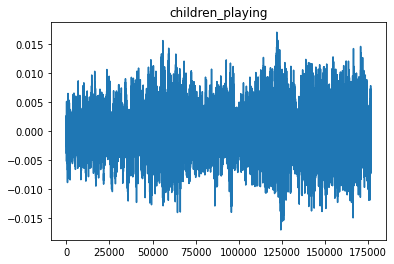

In [54]:
print(signal.shape)
plt.plot(np.arange(len(signal[1,:])), signal[1,:])
plt.title(f"{class_id}")
Audio(fpath, autoplay=True)

In [63]:
n_fft = 1024
hop_length = None
n_mels = 64
mel_spec = transforms.MelSpectrogram(samp_rate, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)(signal)
print(mel_spec.shape)

torch.Size([2, 64, 345])


In [69]:
mel_spec

tensor([[[1.1252e-02, 4.7394e-01, 6.8812e-01,  ..., 1.0312e-01,
          6.6049e-01, 2.2884e-01],
         [2.3345e-02, 5.5413e-01, 1.1819e+00,  ..., 1.8616e-01,
          5.3445e-01, 3.1453e-01],
         [1.7923e-02, 4.3591e-01, 4.5683e-01,  ..., 1.5410e-01,
          1.2554e-01, 2.8736e-01],
         ...,
         [3.0505e-06, 1.1387e-06, 2.1173e-06,  ..., 1.9931e-06,
          1.7092e-06, 1.3200e-06],
         [3.7135e-06, 9.4385e-07, 1.0949e-06,  ..., 1.8242e-06,
          1.3039e-06, 1.3684e-06],
         [4.3408e-06, 1.6394e-06, 1.2999e-06,  ..., 1.3615e-06,
          1.0836e-06, 1.0893e-06]],

        [[2.6978e-03, 1.8524e-01, 2.0449e-01,  ..., 2.2523e-01,
          5.8601e-01, 5.5898e-01],
         [6.1093e-02, 9.9228e-02, 9.4276e-01,  ..., 1.4190e-01,
          4.2862e-01, 4.3222e-01],
         [8.0399e-02, 2.4275e-01, 4.9230e-01,  ..., 1.2901e-01,
          1.3320e-01, 3.5305e-01],
         ...,
         [2.6168e-06, 1.1077e-06, 1.5206e-06,  ..., 2.1484e-06,
          1.921

In [71]:
spectogram = torchaudio.transforms.Spectrogram()
original = spectogram(mel_spec)

In [364]:
# Helpful functions from https://pytorch.org/tutorials/beginner/audio_preprocessing_tutorial.html
def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None, ylim=None, size=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(num_frames) / sample_rate

  fig, axes = plt.subplots(num_channels, 1, figsize=(16,10))
  if num_channels == 1:
    axes = [axes]
    
  for channel in range(num_channels):
    ax = axes[channel]
    ax.plot(time_axis, waveform[channel], linewidth=1)
    ax.grid(True)
    if num_channels > 1:
      ax.set_title(f'Channel {channel + 1}', size=size)
    if xlim:
      ax.set_xlim(xlim)
    if ylim:
      ax.set_ylim(ylim)
    ax.set_xlabel("Time [s]", size=size)
    ax.set_ylabel("Amplitude", size=size)
  fig.suptitle(title, size=20)
  fig.tight_layout()
  plt.show(block=False)

def plot_specgram(waveform, sample_rate, title="Spectrogram", xlim=None, size=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(num_frames) / sample_rate

  fig, axes = plt.subplots(num_channels, 1, figsize=(16, 10))
  if num_channels == 1:
    axes = [axes]
  
  cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_under(color='k', alpha=None)
  for channel in range(num_channels):
    ax = axes[channel]
    pxx, freq, t, cax = ax.specgram(waveform[channel], Fs=sample_rate, cmap=cmap)
    ax.set_xlabel("Time [s]", size=size)
    ax.set_ylabel("Frequency [Hz]", size=size)
    if num_channels > 1:
      ax.set_title(f'Channel {channel + 1}')
    if xlim:
      ax.set_xlim(xlim)
  fig.suptitle(title, size=20)
  
  # Add colorbar for fig
  fig.subplots_adjust(right=0.8)
  cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
  cbar = fig.colorbar(cax, cax=cbar_ax)
  # cbar.ax.set_title('Amplitude [dB]', rotation=0, size=20)
  cbar.ax.set_ylabel('Amplitude [dB]', rotation=270, size=20)
  cbar.ax.get_yaxis().labelpad = 25


  plt.show(block=True)

def play_audio(waveform, sample_rate):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  if num_channels == 1:
    display(Audio(waveform[0], rate=sample_rate))
  elif num_channels == 2:
    display(Audio((waveform[0], waveform[1]), rate=sample_rate))
  else:
    raise ValueError("Waveform with more than 2 channels are not supported.")

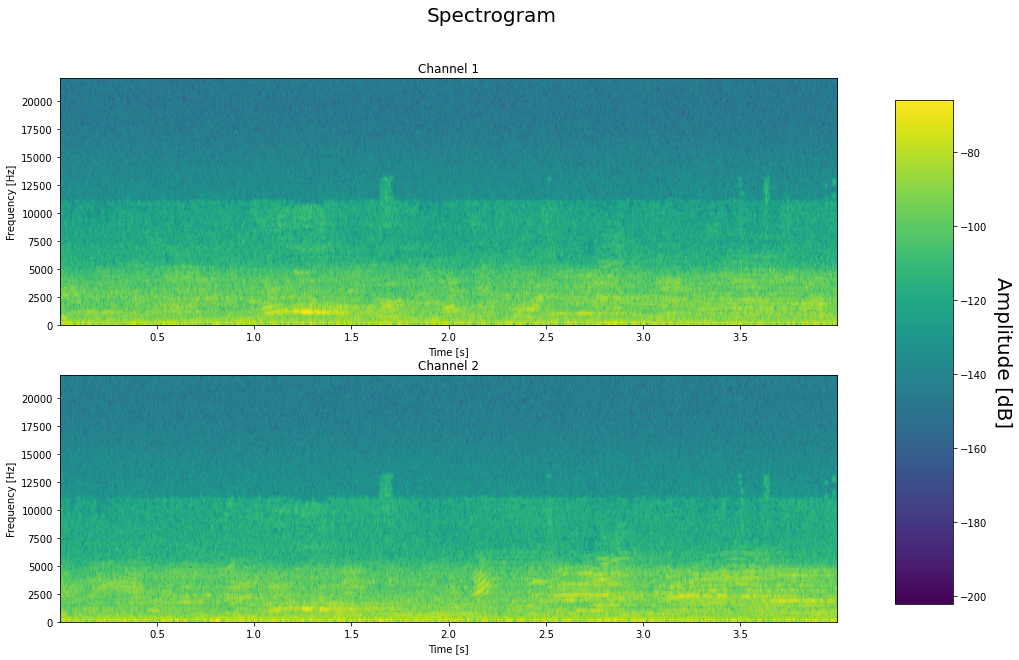

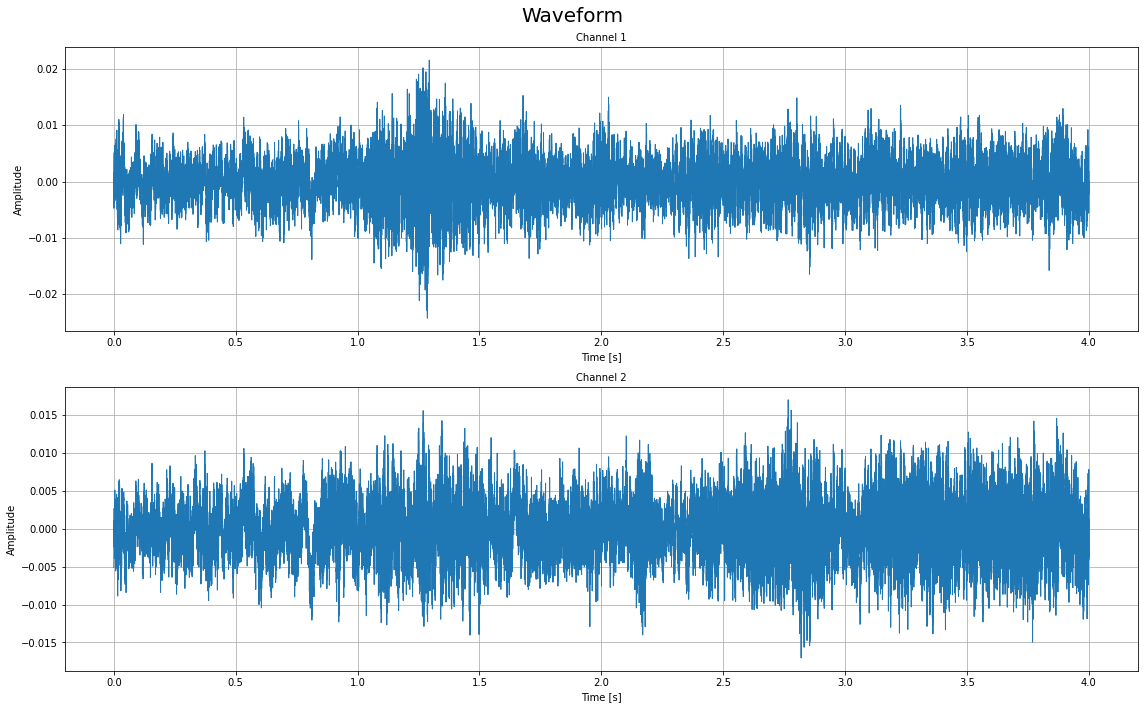

In [365]:
channel = 1
my_signal = signal[channel, np.newaxis, :]
my_signal = signal
my_signal.shape
plot_specgram(my_signal, samp_rate)
plot_waveform(my_signal, samp_rate)
play_audio(my_signal, samp_rate)

In [361]:
signal.numpy().shape

(2, 176400)